In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "sicilia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,19,Sicilia,1,0,1,2,3,3,3,...,0.0,0.0,0.0,2.0,0.00,33.33,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,19,Sicilia,1,0,1,2,3,0,0,...,0.0,0.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,19,Sicilia,1,0,1,1,2,-1,1,...,0.0,0.0,0.0,-1.0,0.00,50.00,0.00,0.00,0.00,-33.33
3,2020-02-28T18:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,0.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,1.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2020-12-22T17:00:00,19,Sicilia,1059,176,1235,32257,33492,-411,894,...,22.0,8689.0,5138.0,-379.0,14.25,3.69,10.29,17.40,-2.76,-1.21
302,2020-12-23T17:00:00,19,Sicilia,1028,176,1204,32410,33614,122,932,...,10.0,9264.0,5809.0,153.0,14.62,3.58,10.06,16.04,0.00,0.36
303,2020-12-24T17:00:00,19,Sicilia,1008,173,1181,32199,33380,-234,853,...,26.0,8135.0,4808.0,-211.0,14.65,3.54,10.49,17.74,-1.70,-0.70
304,2020-12-25T17:00:00,19,Sicilia,995,174,1169,32063,33232,-148,720,...,17.0,6472.0,4215.0,-136.0,14.88,3.52,11.12,17.08,0.58,-0.44


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 26, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 337
Nuovi tamponi: 4038.0
Percentuale nuovi positivi/nuovi tamponi: 8.3 %
Nuovi guariti: 252.0
Nuovi deceduti: 27.0
Variazione positivi ricoverati con sintomi: 19.0
Variazione positivi in terapia intensiva: -4.0
Variazione positivi in isolamento dimiciliare: 43.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 26, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-27T17:00:00,19,Sicilia,727,103,830,10904,11734,789,860,...,10.0,7324.0,4391.0,734.0,12.41,7.07,11.74,19.59,5.10,7.21
1,2020-10-28T17:00:00,19,Sicilia,787,111,898,11290,12188,454,708,...,10.0,7499.0,4342.0,386.0,12.36,7.37,9.44,16.31,7.77,3.87
2,2020-10-29T17:00:00,19,Sicilia,839,115,954,11791,12745,557,789,...,13.0,7226.0,4472.0,501.0,12.05,7.49,10.92,17.64,3.60,4.57
3,2020-10-30T17:00:00,19,Sicilia,895,117,1012,12552,13564,819,984,...,12.0,7293.0,4649.0,761.0,11.56,7.46,13.49,21.17,1.74,6.43
4,2020-10-31T17:00:00,19,Sicilia,962,122,1084,13358,14442,878,952,...,18.0,8106.0,5303.0,806.0,11.25,7.51,11.74,17.95,4.27,6.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-22T17:00:00,19,Sicilia,1059,176,1235,32257,33492,-411,894,...,22.0,8689.0,5138.0,-379.0,14.25,3.69,10.29,17.40,-2.76,-1.21
57,2020-12-23T17:00:00,19,Sicilia,1028,176,1204,32410,33614,122,932,...,10.0,9264.0,5809.0,153.0,14.62,3.58,10.06,16.04,0.00,0.36
58,2020-12-24T17:00:00,19,Sicilia,1008,173,1181,32199,33380,-234,853,...,26.0,8135.0,4808.0,-211.0,14.65,3.54,10.49,17.74,-1.70,-0.70
59,2020-12-25T17:00:00,19,Sicilia,995,174,1169,32063,33232,-148,720,...,17.0,6472.0,4215.0,-136.0,14.88,3.52,11.12,17.08,0.58,-0.44


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

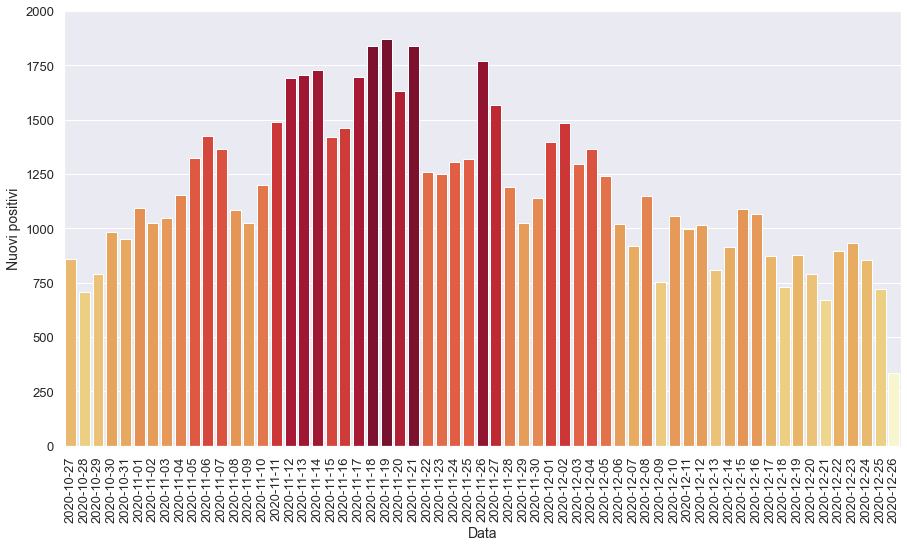

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

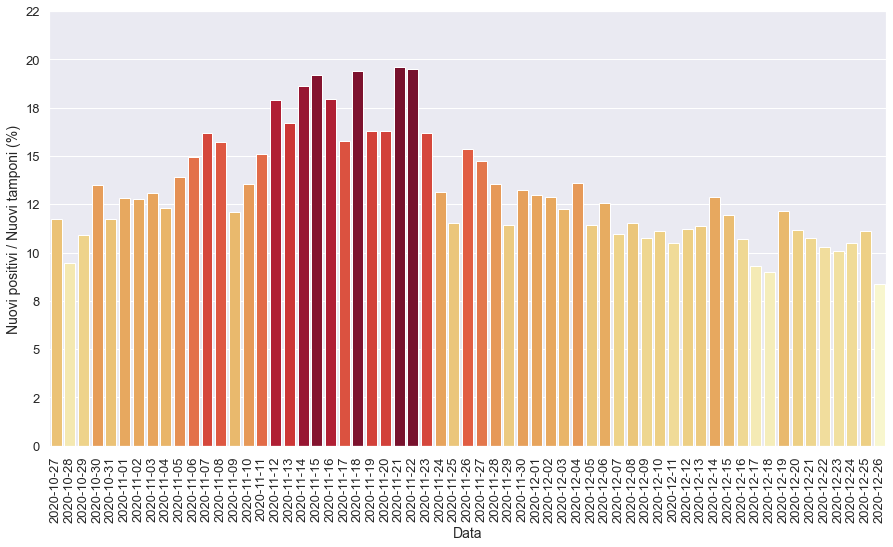

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

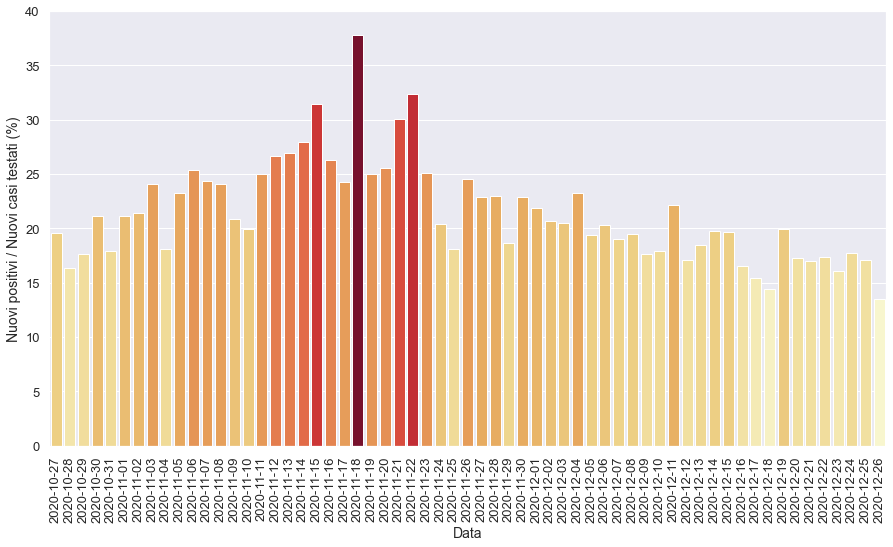

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

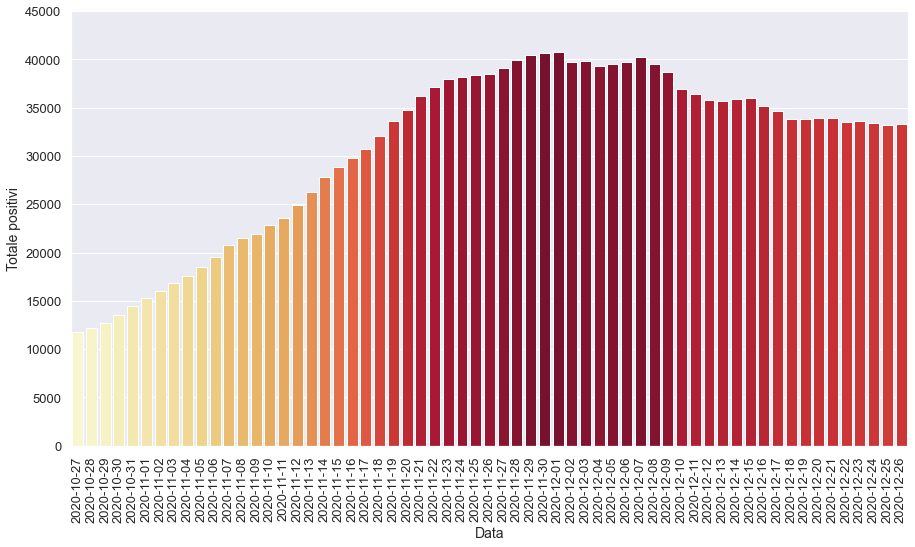

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

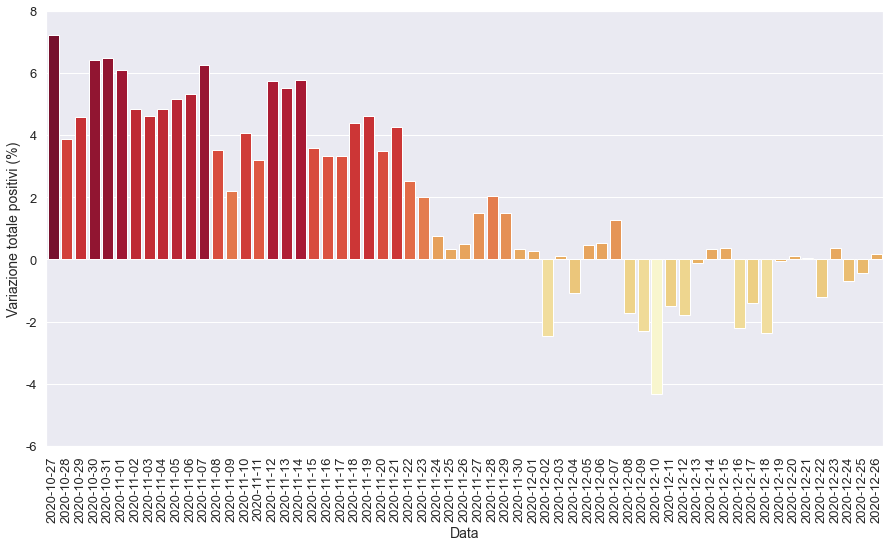

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

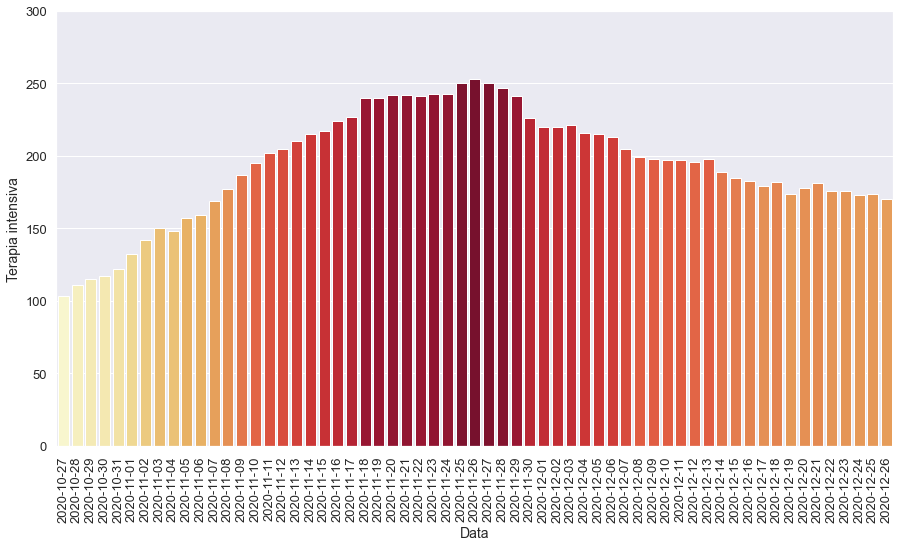

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

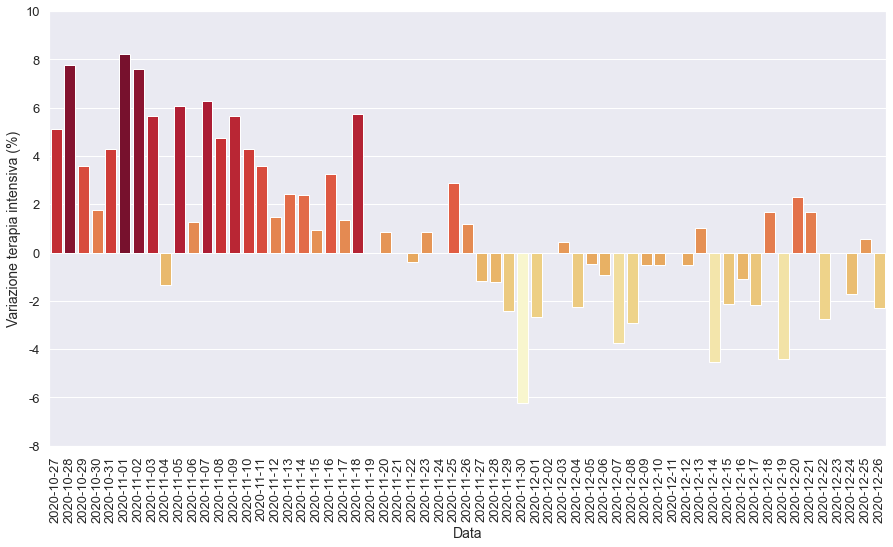

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

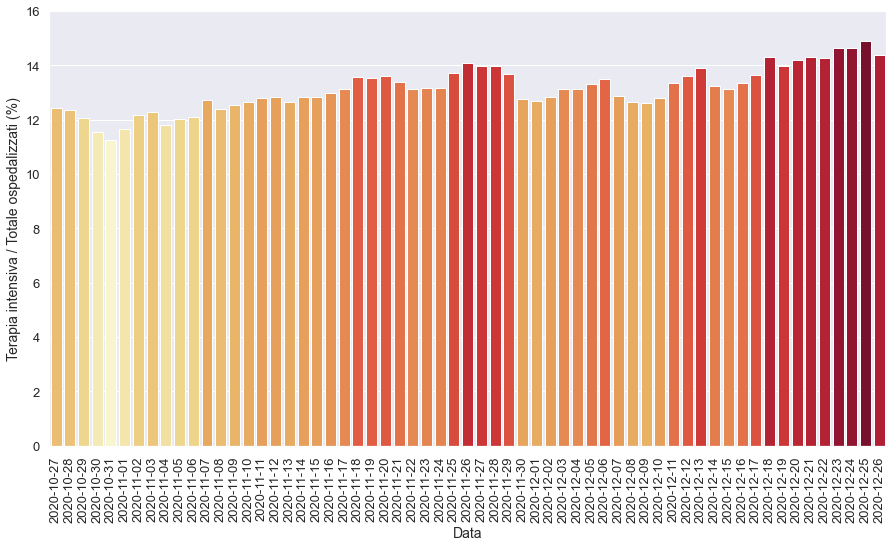

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

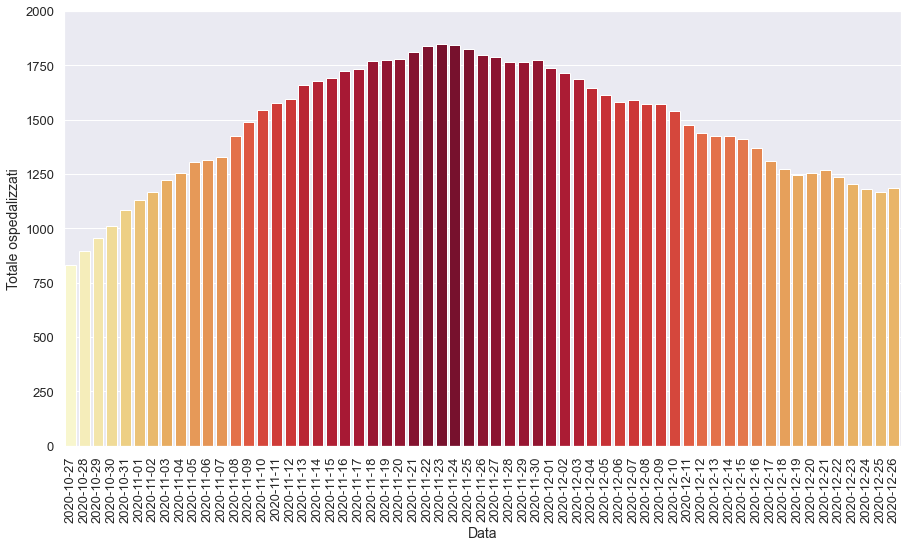

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

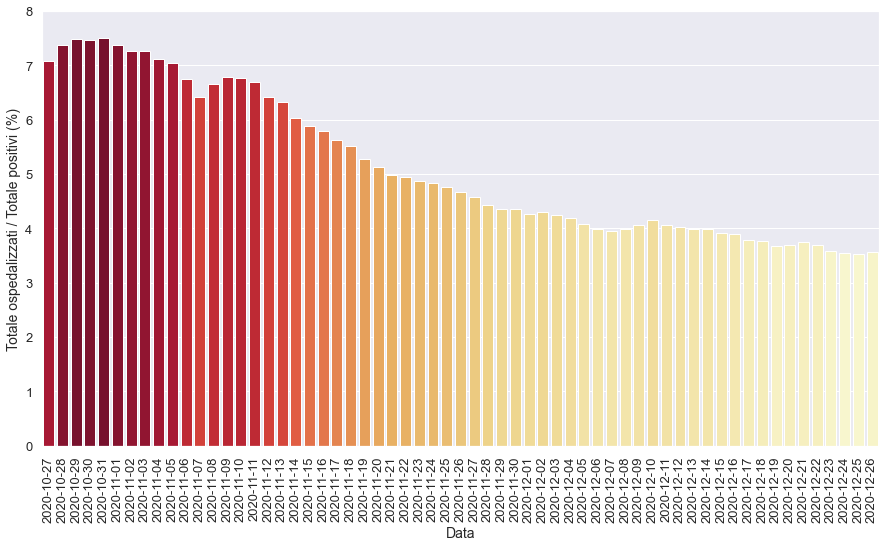

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

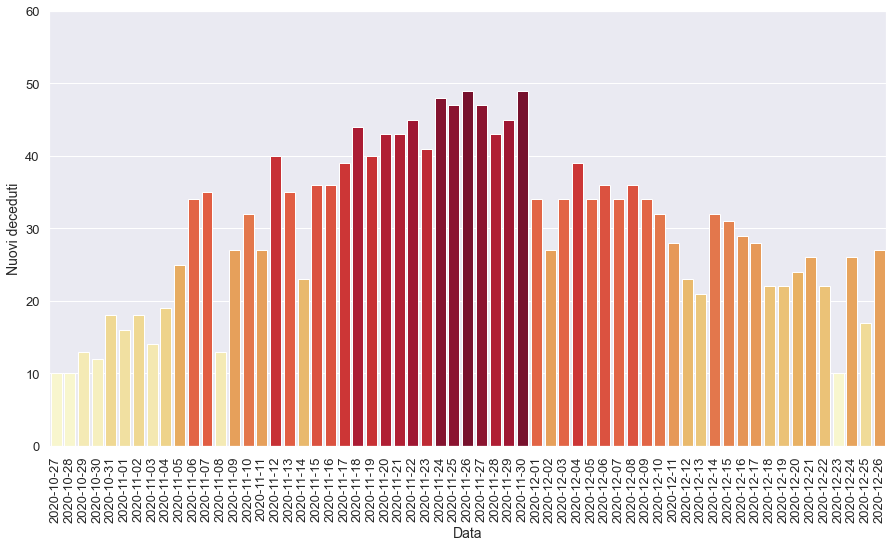

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

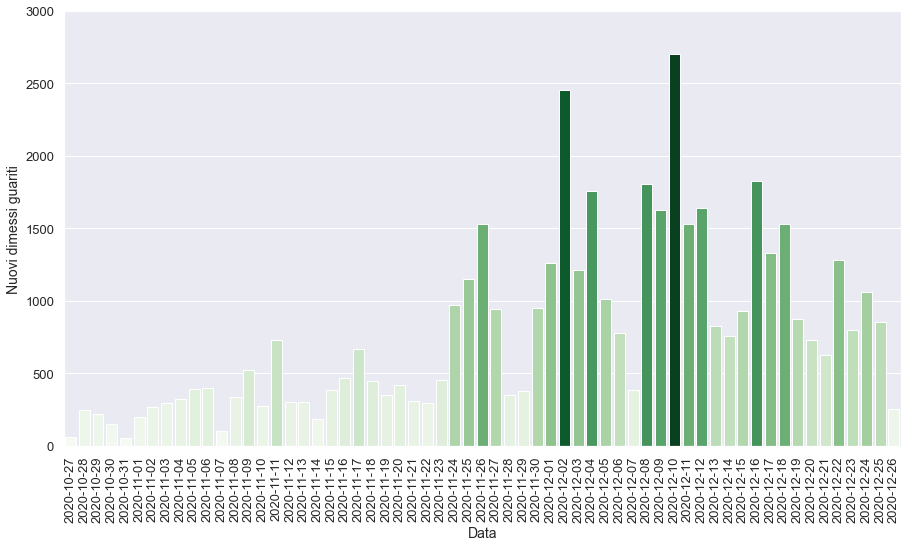

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-26T17:00:00,19,Sicilia,1545,253,1798,36710,38508,188,1768,...,49.0,11500.0,7202.0,214.0,14.07,4.67,15.37,24.55,1.20,0.49
1,2020-11-27T17:00:00,19,Sicilia,1539,250,1789,37294,39083,575,1566,...,47.0,10635.0,6842.0,584.0,13.97,4.58,14.72,22.89,-1.19,1.49
2,2020-11-28T17:00:00,19,Sicilia,1519,247,1766,38116,39882,799,1189,...,43.0,8777.0,5184.0,822.0,13.99,4.43,13.55,22.94,-1.20,2.04
3,2020-11-29T17:00:00,19,Sicilia,1522,241,1763,38721,40484,602,1024,...,45.0,8965.0,5479.0,605.0,13.67,4.35,11.42,18.69,-2.43,1.51
4,2020-11-30T17:00:00,19,Sicilia,1547,226,1773,38851,40624,140,1138,...,49.0,8602.0,4965.0,130.0,12.75,4.36,13.23,22.92,-6.22,0.35
5,2020-12-01T17:00:00,19,Sicilia,1517,220,1737,38993,40730,106,1399,...,34.0,10773.0,6386.0,142.0,12.67,4.26,12.99,21.91,-2.65,0.26
6,2020-12-02T17:00:00,19,Sicilia,1494,220,1714,38017,39731,-999,1483,...,27.0,11536.0,7171.0,-976.0,12.84,4.31,12.86,20.68,0.00,-2.45
7,2020-12-03T17:00:00,19,Sicilia,1465,221,1686,38094,39780,49,1294,...,34.0,10581.0,6329.0,77.0,13.11,4.24,12.23,20.45,0.45,0.12
8,2020-12-04T17:00:00,19,Sicilia,1431,216,1647,37703,39350,-430,1365,...,39.0,10026.0,5870.0,-391.0,13.11,4.19,13.61,23.25,-2.26,-1.08
9,2020-12-05T17:00:00,19,Sicilia,1400,215,1615,37925,39540,190,1240,...,34.0,10875.0,6398.0,222.0,13.31,4.08,11.40,19.38,-0.46,0.48


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

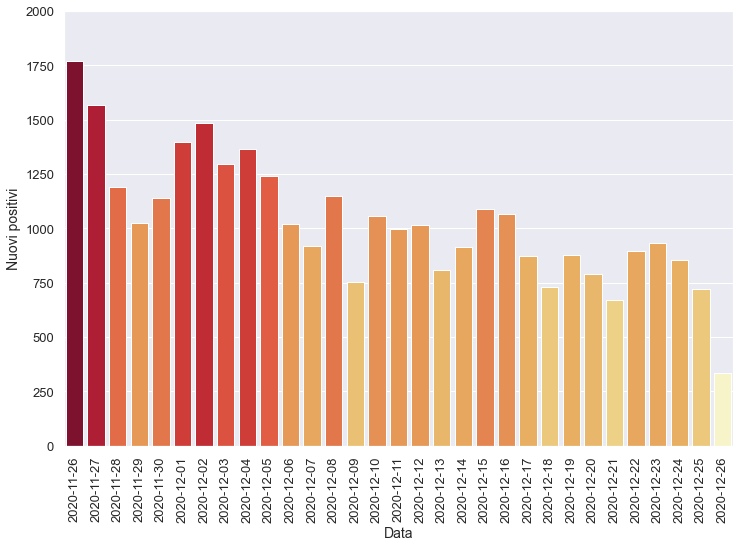

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

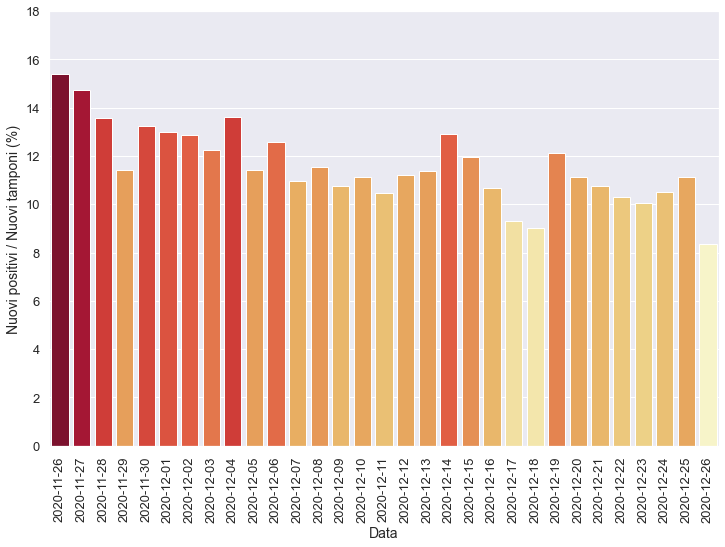

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

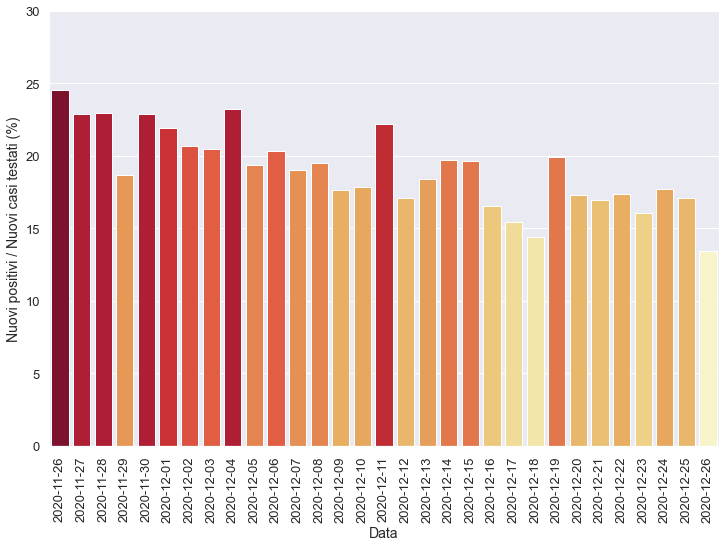

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

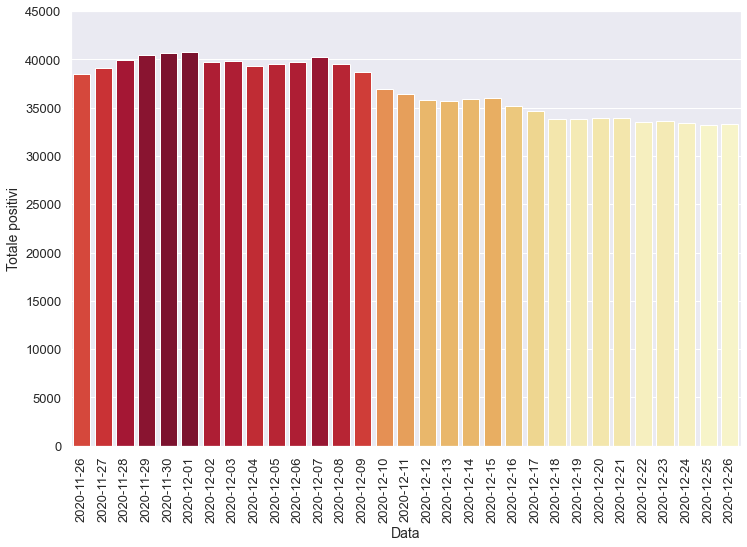

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

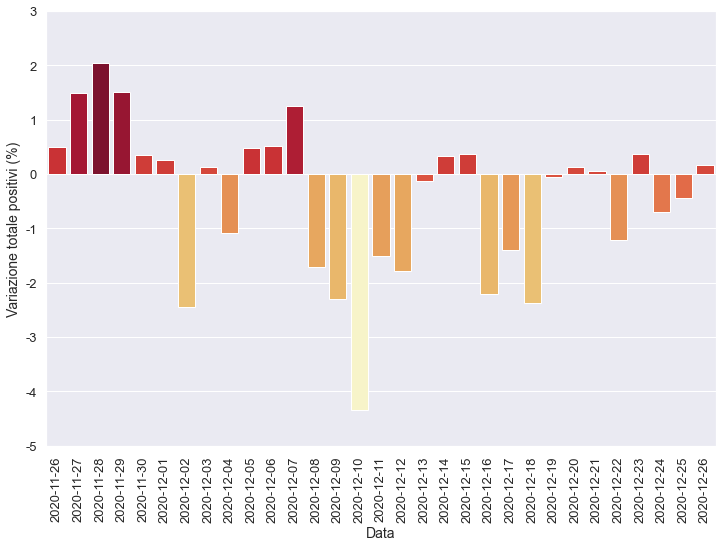

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

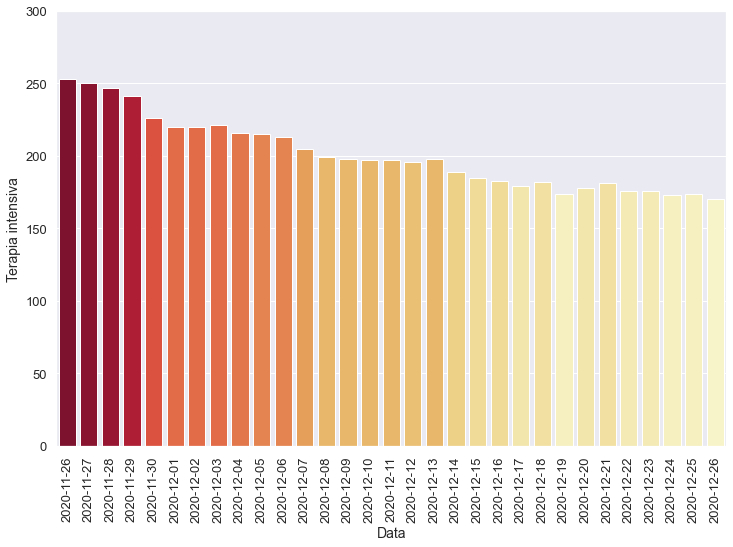

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

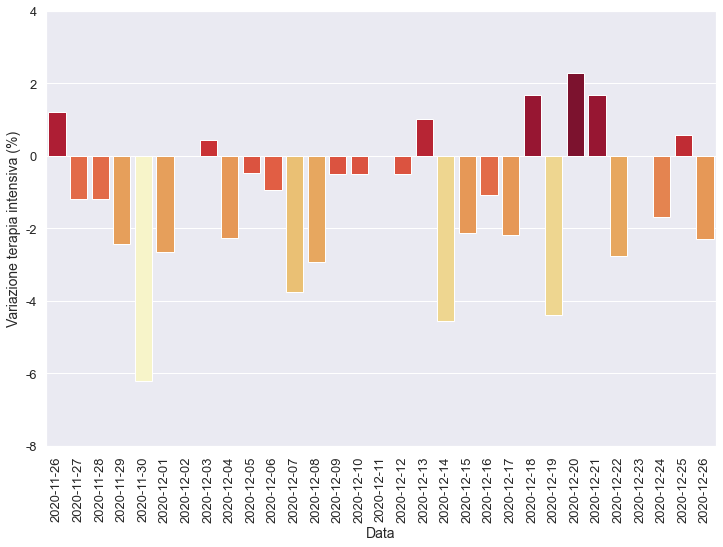

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

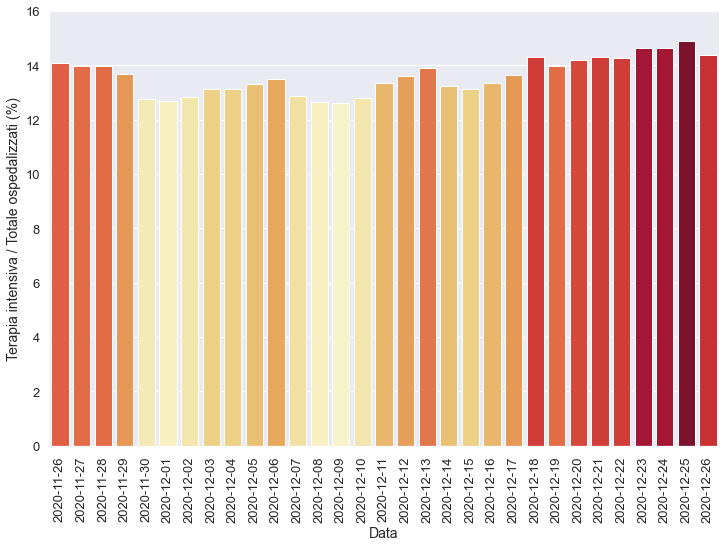

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

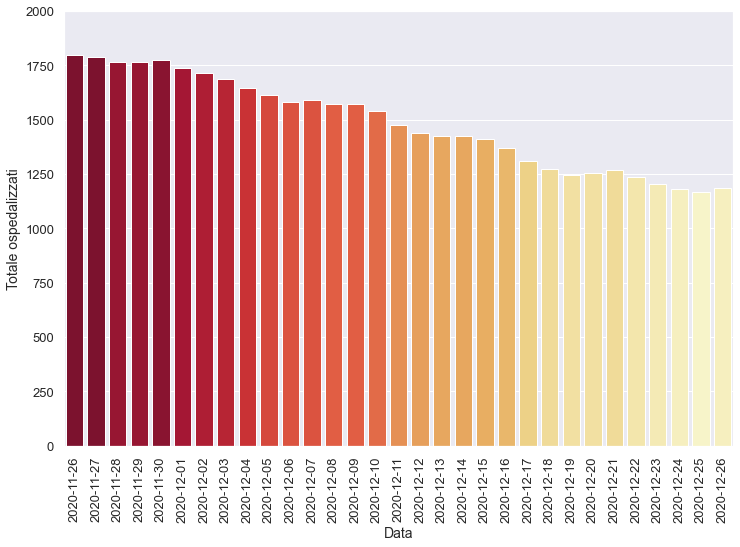

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

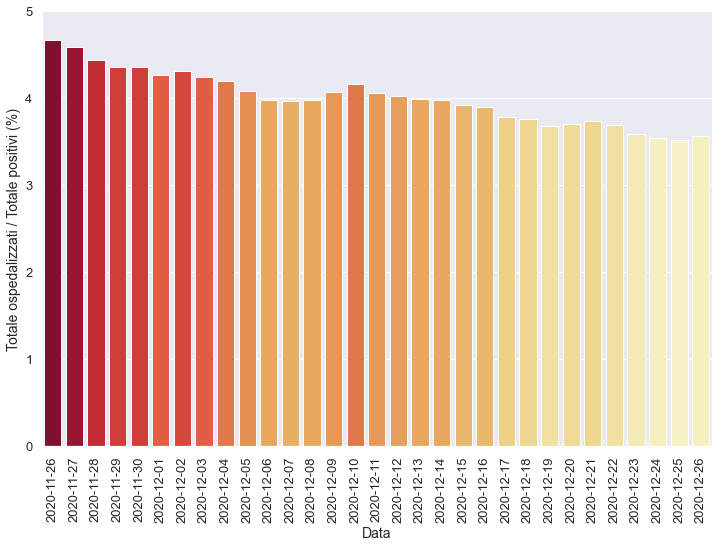

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

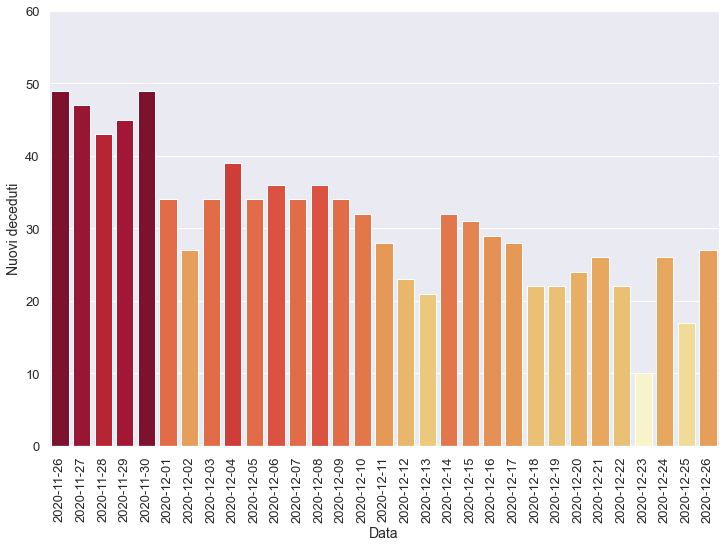

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

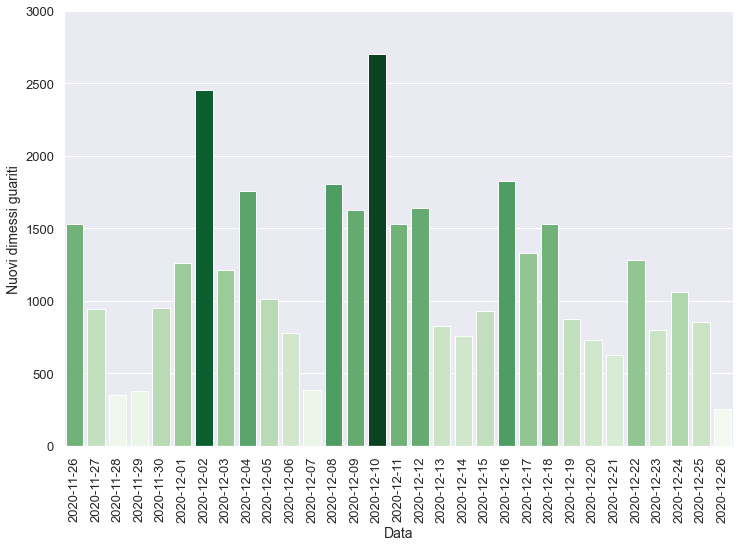

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-19T17:00:00,19,Sicilia,1071,174,1245,32598,33843,-22,878,...,22.0,7237.0,4412.0,6.0,13.98,3.68,12.13,19.90,-4.40,-0.06
1,2020-12-20T17:00:00,19,Sicilia,1076,178,1254,32629,33883,40,792,...,24.0,7109.0,4584.0,31.0,14.19,3.70,11.14,17.28,2.30,0.12
2,2020-12-21T17:00:00,19,Sicilia,1086,181,1267,32636,33903,20,669,...,26.0,6216.0,3942.0,7.0,14.29,3.74,10.76,16.97,1.69,0.06
3,2020-12-22T17:00:00,19,Sicilia,1059,176,1235,32257,33492,-411,894,...,22.0,8689.0,5138.0,-379.0,14.25,3.69,10.29,17.40,-2.76,-1.21
4,2020-12-23T17:00:00,19,Sicilia,1028,176,1204,32410,33614,122,932,...,10.0,9264.0,5809.0,153.0,14.62,3.58,10.06,16.04,0.00,0.36
5,2020-12-24T17:00:00,19,Sicilia,1008,173,1181,32199,33380,-234,853,...,26.0,8135.0,4808.0,-211.0,14.65,3.54,10.49,17.74,-1.70,-0.70
6,2020-12-25T17:00:00,19,Sicilia,995,174,1169,32063,33232,-148,720,...,17.0,6472.0,4215.0,-136.0,14.88,3.52,11.12,17.08,0.58,-0.44
7,2020-12-26T17:00:00,19,Sicilia,1014,170,1184,32106,33290,58,337,...,27.0,4038.0,2501.0,43.0,14.36,3.56,8.35,13.47,-2.30,0.17


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

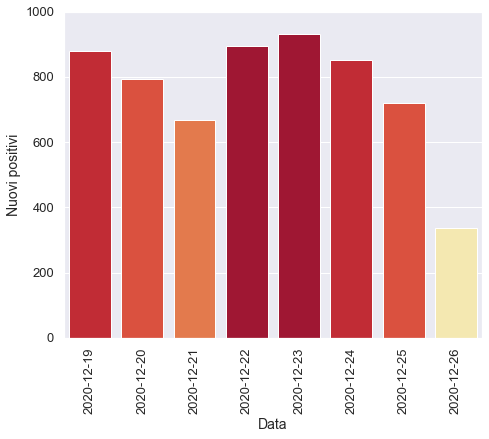

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

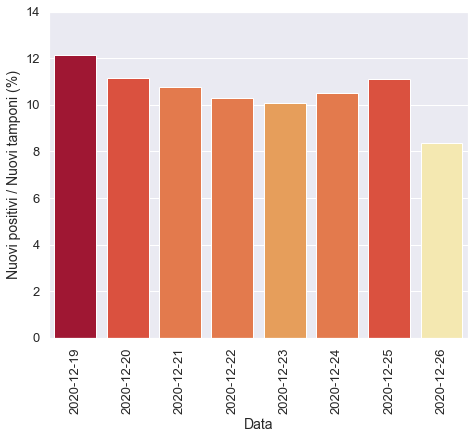

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

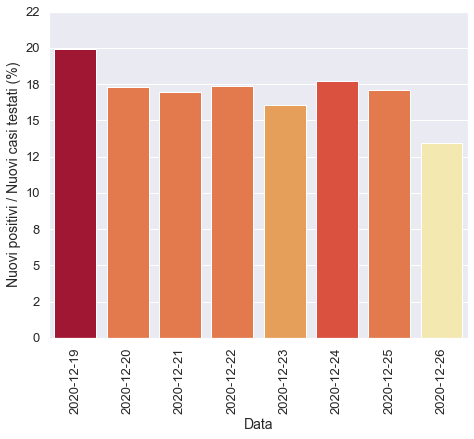

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

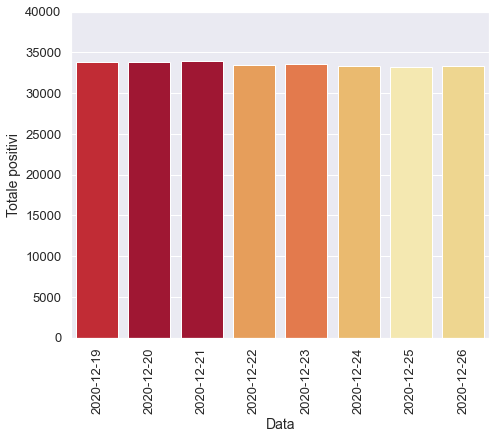

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

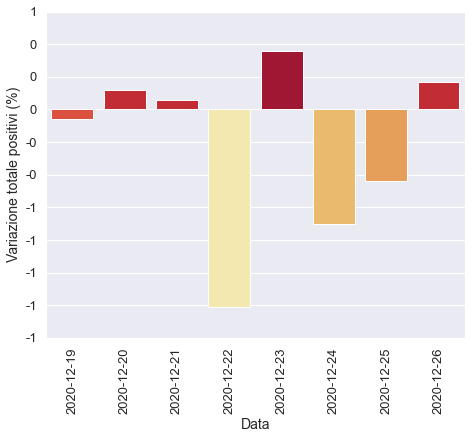

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

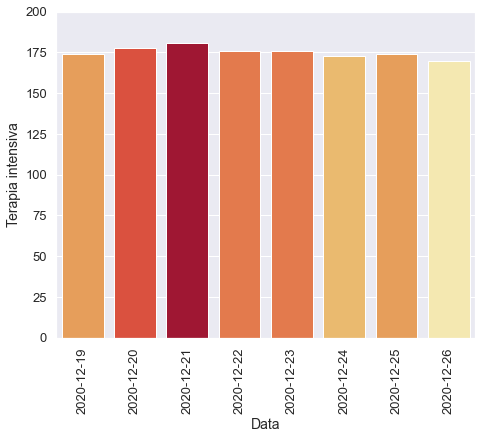

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

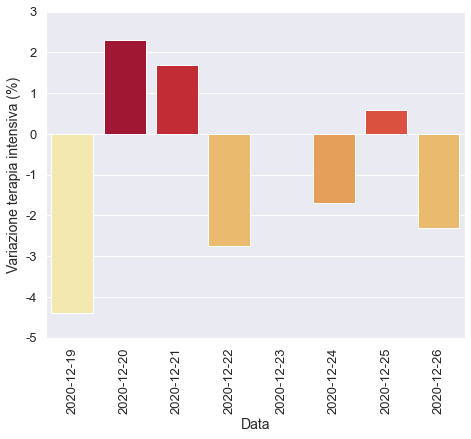

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

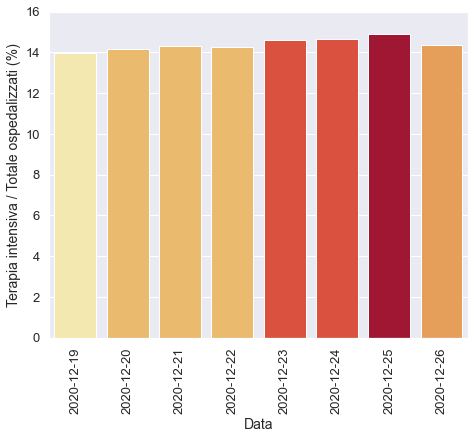

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

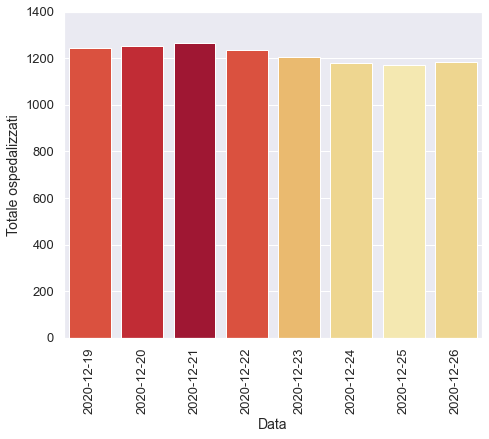

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

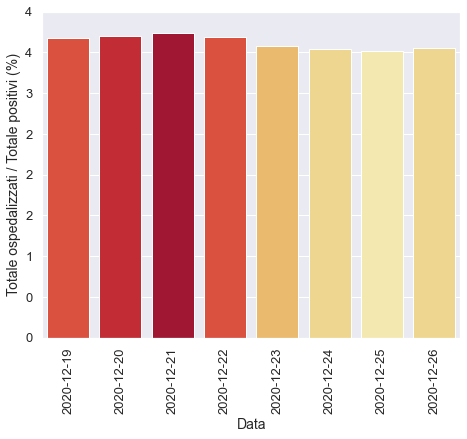

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

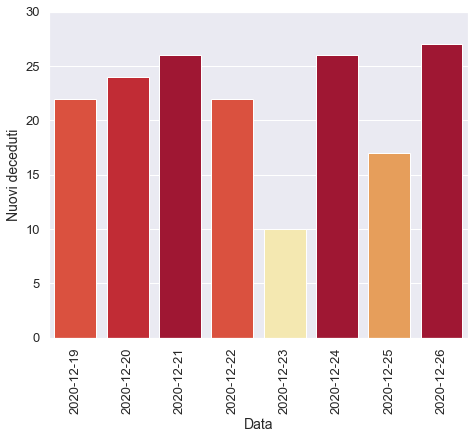

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

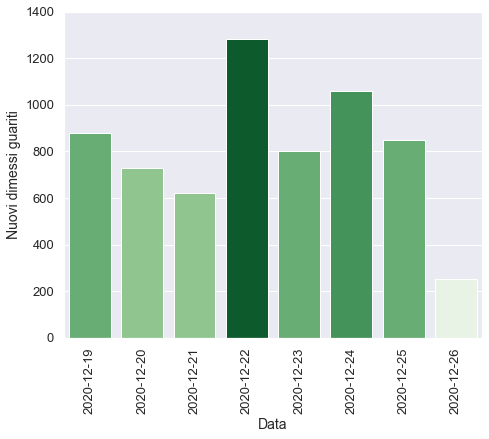

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)